In [22]:
import pprint

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_boston()

In [3]:
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [4]:
pprint.pprint(data['DESCR'])

('Boston House Prices dataset\n'
 '===========================\n'
 '\n'
 'Notes\n'
 '------\n'
 'Data Set Characteristics:  \n'
 '\n'
 '    :Number of Instances: 506 \n'
 '\n'
 '    :Number of Attributes: 13 numeric/categorical predictive\n'
 '    \n'
 '    :Median Value (attribute 14) is usually the target\n'
 '\n'
 '    :Attribute Information (in order):\n'
 '        - CRIM     per capita crime rate by town\n'
 '        - ZN       proportion of residential land zoned for lots over 25,000 '
 'sq.ft.\n'
 '        - INDUS    proportion of non-retail business acres per town\n'
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; '
 '0 otherwise)\n'
 '        - NOX      nitric oxides concentration (parts per 10 million)\n'
 '        - RM       average number of rooms per dwelling\n'
 '        - AGE      proportion of owner-occupied units built prior to 1940\n'
 '        - DIS      weighted distances to five Boston employment centres\n'
 '        - RAD      index o

In [5]:
matrix = data['data']
target = data['target']

In [6]:
df = pd.DataFrame(data=matrix, columns=data['feature_names'])

In [7]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
for i, col in enumerate(df.columns):
    print(i, col, df[col].nunique())

0 CRIM 504
1 ZN 26
2 INDUS 76
3 CHAS 2
4 NOX 81
5 RM 446
6 AGE 356
7 DIS 412
8 RAD 9
9 TAX 66
10 PTRATIO 46
11 B 357
12 LSTAT 455


In [11]:
df['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [12]:
pd.Series(target).describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

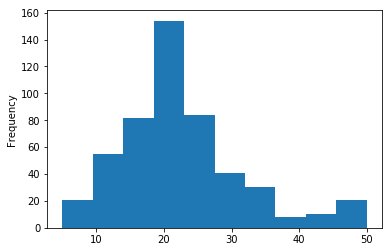

In [13]:
pd.Series(target).plot.hist()

### можно попробовать закодировать категориальную переменную

In [14]:
ohe = OneHotEncoder(categorical_features=[8], sparse=False)
new_df = ohe.fit_transform(df)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(new_df, target, random_state=42)

### как будет видно дальше, значимого прироста к качеству это не дало

In [16]:
ridge = Ridge().fit(X_train, y_train)
print("Качество на тестовом наборе c one hot encoding {:.3f}".format(
r2_score(y_test, ridge.predict(X_test))))

Качество на тестовом наборе c one hot encoding 0.681


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, target, random_state=42)

### линейная регрессия нуждается в масштабировании данных

In [18]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### в случае наличия нелинейных взаимосвязей полиномиальные признаки могут улучшить значение метрики качества

In [19]:
poly = PolynomialFeatures(degree=3).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [31]:
ridge = Ridge().fit(X_train, y_train)
print("Качество на тестовом наборе без масштабирования: {:.3f}".format(
r2_score(y_test, ridge.predict(X_test))))
      
ridge = Ridge().fit(X_train_scaled, y_train)
print("Качество на тестовом наборе с масштабированием: {:.3f}".format(
r2_score(y_test, ridge.predict(X_test_scaled))))
      
ridge = Ridge().fit(X_train_poly, y_train)
print("Качество на тестовом наборе с масштабированием и полиномильными признаками: {:.3f}".format(
r2_score(y_test, ridge.predict(X_test_poly))))

Качество на тестовом наборе без масштабирования: 0.679
Качество на тестовом наборе с масштабированием: 0.691
Качество на тестовом наборе с масштабированием и полиномильными признаками: 0.830


In [36]:
ridge = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], store_cv_values=True).fit(X_train_poly, y_train)
print("Качество на тестовом наборе с подбором величины параметра регуляризации: {:.3f}".format(
r2_score(y_test, ridge.predict(X_test_poly))))

Качество на тестовом наборе с подбором величины параметра регуляризации: 0.833


In [39]:
ridge.alpha_

0.1